In this assignment students need to predict whether a person makes over 50K per year
or not from classic adult dataset using XGBoost. The description of the dataset is as
follows:

Data Set Information:
Extraction was done by Barry Becker from the 1994 Census database. A set of
reasonably clean records was extracted using the following conditions: ((AAGE>16) &&
(AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Attribute Information:
Listing of attributes:
>50K, <=50K.
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,
Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc,
9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed,
Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial,
Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing,
Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany,
Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras,
Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala,
Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong,
Holand-Netherlands.

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_svmlight_files
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [3]:
train_set.shape

(32561, 15)

In [4]:
test_set.shape

(16281, 15)

In [5]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [7]:
dataset_ = pd.concat([train_set, test_set], axis=0)
dataset_.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
dataset_.replace(' ?', np.nan, inplace=True)

In [9]:
dataset_.shape

(48842, 15)

In [10]:
dataset_.wage_class.unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [39]:
dataset_.wage_class = dataset_.wage_class.apply(lambda x:1 if x == ' >50K' or x == ' >50K.' else 0)

In [11]:
dataset = pd.get_dummies(data= dataset_, columns=['workclass', 'education', 'marital_status','occupation','relationship','race','sex','native_country'])
dataset.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
dataset.columns.tolist()

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'wage_class',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital_status_ Divorced',
 'marital_status_ Married-AF-spouse',
 'marital_status_ Married-civ-spouse',
 'marital_status_ Married-spouse-absent',
 'marital_status_ Never-married',
 'marital_status_ Separated',
 'marital_status_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occup

In [14]:
len(dataset.loc[dataset.wage_class == 1])

11687

In [15]:
LR = LogisticRegression()

In [16]:
X = dataset.drop('wage_class')
Y = dataset.wage_class
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,random_state =7)

In [17]:
LR.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
print(accuracy_score(Y_test, LR.predict(X_test)))

0.791847623775


In [19]:
len(X_test.loc[X_test.wage_class == 1])

3919

In [20]:
xgboost = XGBClassifier()
xgboost.fit(X_train, Y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [21]:
prediction = xgboost.predict(X_test)
print(accuracy_score(Y_test, xgboost.predict(X_test)))

1.0


In [22]:
eval_set = [(X_test, Y_test)]


In [23]:
xgboost.fit(X_train, Y_train, early_stopping_rounds=5, eval_metric='auc',  eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = xgboost.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-auc:1
Will train until validation_0-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:1
[2]	validation_0-auc:1
[3]	validation_0-auc:1
[4]	validation_0-auc:1
[5]	validation_0-auc:1
Stopping. Best iteration:
[0]	validation_0-auc:1

Accuracy: 100.00%


In [24]:
print(xgboost.get_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1}


In [25]:
XGBA = accuracy_score(Y_test, prediction)
print("The Accuracy  is {}".format(XGBA))

The Accuracy  is 1.0


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import ggplot
from ggplot import *


C:\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [27]:
dataset_.age = pd.to_numeric(dataset_.age.replace(',',''))

In [28]:
dataset_.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


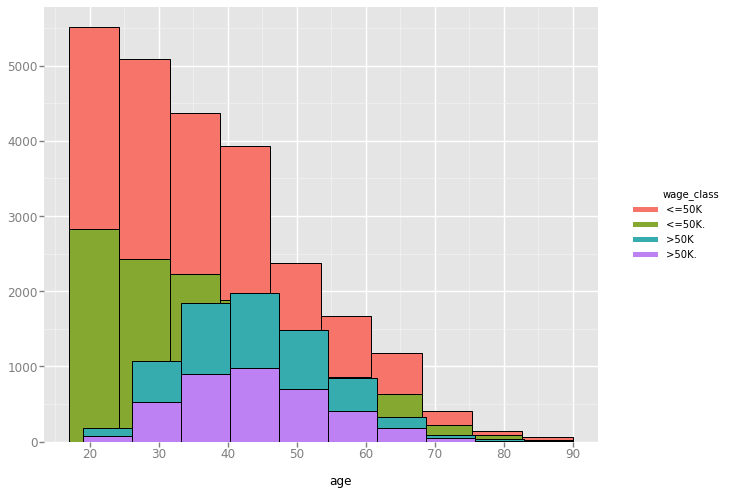

<ggplot: (134982919039)>

In [29]:
ggplot(aes(x='age', fill='wage_class'), data=dataset_) + geom_histogram(color='black')

In [30]:
dataset_.education_num = pd.to_numeric(dataset_.education_num.replace(',',''))

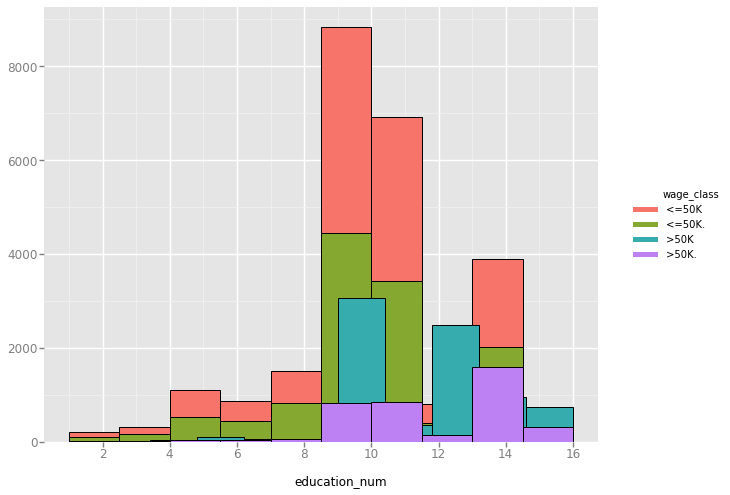

<ggplot: (134982975047)>

In [31]:
ggplot(aes(x='education_num', fill='wage_class'), data=dataset_) + geom_histogram(color='black')

In [32]:
dataset_.hours_per_week = pd.to_numeric(dataset_.hours_per_week.replace(',',''))

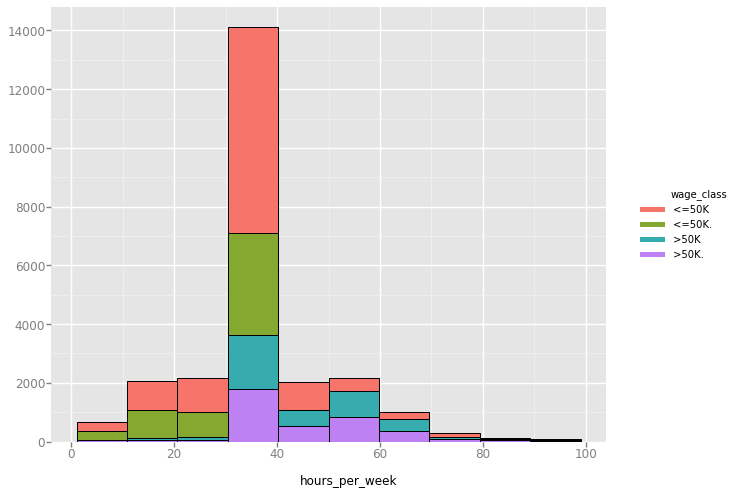

<ggplot: (-9223371901871793134)>

In [33]:
ggplot(aes(x='hours_per_week', fill='wage_class'), data=dataset_) + geom_histogram(color='black')

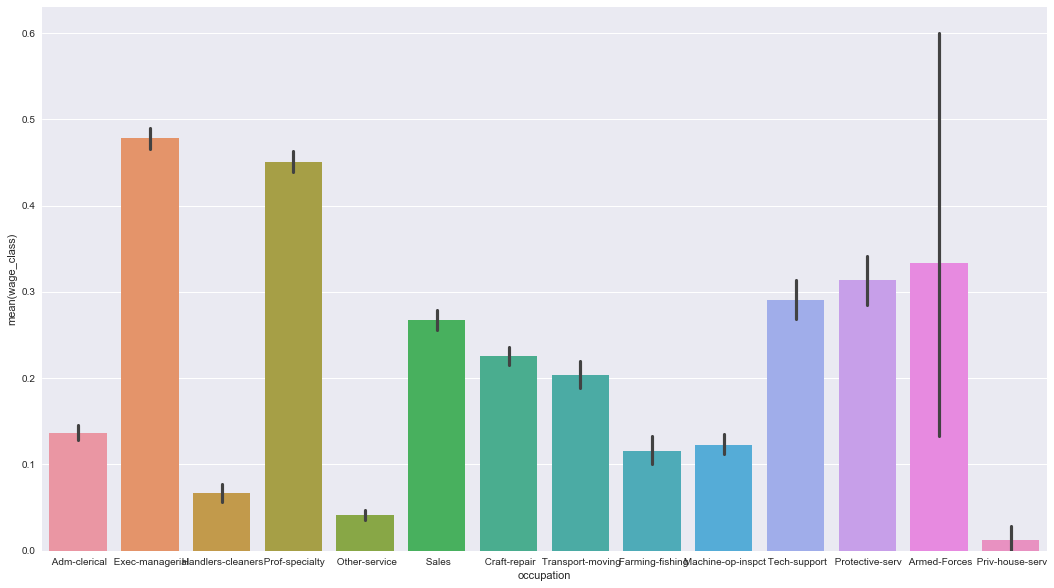

In [42]:
#ggplot(aes(x='occupation', fill='income'), adult_df) +  geom_histogram(color='black') 
fig, axs = plt.subplots(figsize=(18,10), sharey=True)
#axs[0].bar(adult_df.occupation, adult_df.income)

import seaborn as sns
#sns.set(style="whitegrid", color_codes=True)
sns.barplot(x="occupation", y="wage_class", data=dataset_);


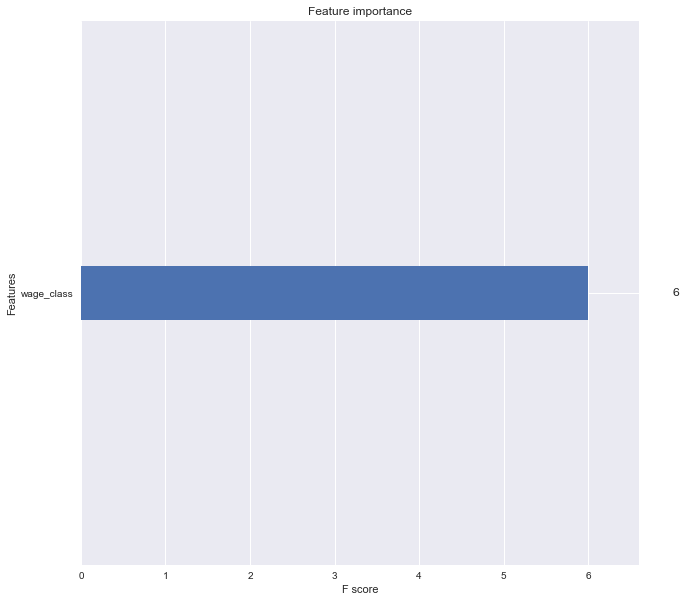

In [43]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
xgboost.feature_importances_
xgb.plot_importance(xgboost, ax=ax, max_num_features=106)


In [44]:
len(dataset['education_ Masters'] == 1 )

48842

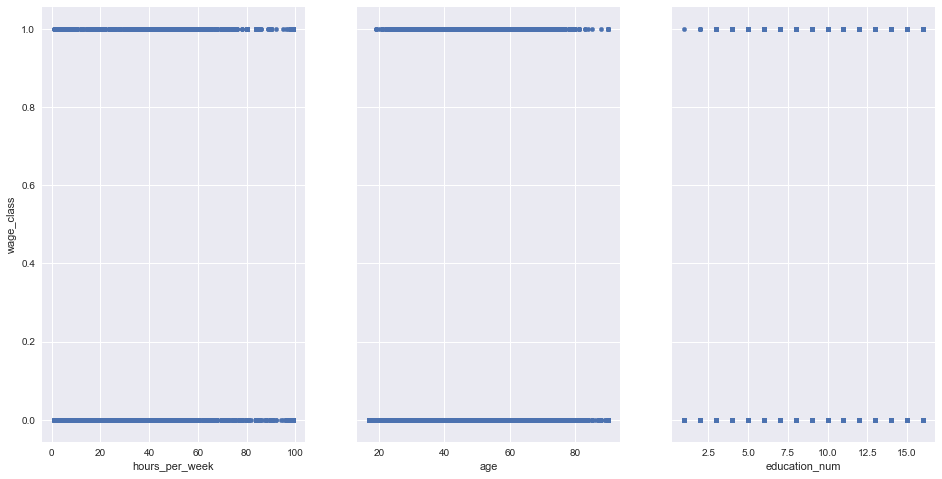

In [45]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
dataset.plot.scatter(x='hours_per_week', y='wage_class', ax=axs[0], figsize=(16, 8))
dataset.plot(kind='scatter', x='age', y='wage_class', ax=axs[1])
dataset.plot(kind='scatter', x='education_num', y='wage_class', ax=axs[2])

In [46]:
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
print(param_grid)
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]

{'max_depth': [2, 4, 6, 8], 'n_estimators': [50, 100, 150, 200]}


Tune max_depth, min_child_weight, gamma, subsample, colsample_bytree

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [48]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
param_test4 = {
 'subsample':[i/10.0 for i in range(1,6)],
 'colsample_bytree':[i/10.0 for i in range(1, 6)]
}
print(param_test4)

{'subsample': [0.1, 0.2, 0.3, 0.4, 0.5], 'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5]}


In [49]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=5,
  gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), param_grid = param_test1, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)
result = grid_search.fit(X, Y)
grid_result = grid_search.fit(X, Y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  8.2min finished


Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  8.4min finished


Best: 1.000000 using {'max_depth': 3, 'min_child_weight': 1}
1.000000 (0.000000) with: {'max_depth': 3, 'min_child_weight': 1}
1.000000 (0.000000) with: {'max_depth': 3, 'min_child_weight': 3}
1.000000 (0.000000) with: {'max_depth': 3, 'min_child_weight': 5}
1.000000 (0.000000) with: {'max_depth': 5, 'min_child_weight': 1}
1.000000 (0.000000) with: {'max_depth': 5, 'min_child_weight': 3}
1.000000 (0.000000) with: {'max_depth': 5, 'min_child_weight': 5}
1.000000 (0.000000) with: {'max_depth': 7, 'min_child_weight': 1}
1.000000 (0.000000) with: {'max_depth': 7, 'min_child_weight': 3}
1.000000 (0.000000) with: {'max_depth': 7, 'min_child_weight': 5}
1.000000 (0.000000) with: {'max_depth': 9, 'min_child_weight': 1}
1.000000 (0.000000) with: {'max_depth': 9, 'min_child_weight': 3}
1.000000 (0.000000) with: {'max_depth': 9, 'min_child_weight': 5}


In [50]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=3,
                                                     min_child_weight = 1,
  subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), param_grid = param_test4, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)
result = grid_search.fit(X, Y)
grid_result = grid_search.fit(X, Y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  9.2min finished


Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  8.9min finished


Best: 1.000000 using {'colsample_bytree': 0.3, 'subsample': 0.1}
0.999696 (0.000407) with: {'colsample_bytree': 0.1, 'subsample': 0.1}
0.999742 (0.000361) with: {'colsample_bytree': 0.1, 'subsample': 0.2}
0.999751 (0.000365) with: {'colsample_bytree': 0.1, 'subsample': 0.3}
0.999759 (0.000344) with: {'colsample_bytree': 0.1, 'subsample': 0.4}
0.999759 (0.000345) with: {'colsample_bytree': 0.1, 'subsample': 0.5}
0.999994 (0.000013) with: {'colsample_bytree': 0.2, 'subsample': 0.1}
0.999996 (0.000010) with: {'colsample_bytree': 0.2, 'subsample': 0.2}
0.999995 (0.000011) with: {'colsample_bytree': 0.2, 'subsample': 0.3}
0.999996 (0.000009) with: {'colsample_bytree': 0.2, 'subsample': 0.4}
0.999997 (0.000007) with: {'colsample_bytree': 0.2, 'subsample': 0.5}
1.000000 (0.000000) with: {'colsample_bytree': 0.3, 'subsample': 0.1}
1.000000 (0.000000) with: {'colsample_bytree': 0.3, 'subsample': 0.2}
1.000000 (0.000000) with: {'colsample_bytree': 0.3, 'subsample': 0.3}
1.000000 (0.000000) with:

In [51]:
xgbModel1 = XGBClassifier( learning_rate =0.01, n_estimators=5000, max_depth=3,
 min_child_weight=1, gamma=0, subsample=0.1, colsample_bytree=0.3,
 objective= 'binary:logistic', nthread=4,  seed=27)

In [52]:
xgbModel1.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=5000,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.1)

In [53]:
accuracy_score(Y_test, xgbModel1.predict(X_test))

1.0

In [54]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test, xgboost.predict(X_test)))
print('****************Confusion Matrix******************')
print(confusion_matrix(Y_test, xgboost.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     12199
          1       1.00      1.00      1.00      3919

avg / total       1.00      1.00      1.00     16118

****************Confusion Matrix******************
[[12199     0]
 [    0  3919]]


#### Conclusion:
    1.As per the above ananlysis, we can see the accuracy is 100% b/w the 
    actual test & the predicted test results.
    2.Since the accuracy score, precision score, recall score are 1.0, 
    hence no cost is incurred on the predicted results.
    3.Also there are no false predictions as there are only True Positives
    and True Negative as seen in the confusion matrix.
    4.After plotting the graphs b/w certain features and the wage_class, it has
    been observed that there is no such feature which is actually impacting the
    wage_class and feature importance is showing 0 values for all the features
    against the wage_class.
    5.Even after applying the Stratified K_folds on xgboost so that number of 1s in both 
    train & test dataset is distributed equiproportionally, the resultant accuracy score
    is 100%.